## ÖDEV-2 

In [1]:
# gerekli tanımlamalar yapıldı
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib notebook

### Ön hazırlık dosyasında verilen kodlar:

#### 2.1.1 Hazır komut kullanmadan çıkış işaretini hesaplama

In [2]:
x = [0, 1, -1, 0, 0] # n = [-1, 3]
y = [0] # y[-1] = 0
for i in range(1, len(x)):
    y.append(-0.5*y[i-1] + x[i] + 2*x[i-1])
print(y)

[0, 1.0, 0.5, -2.25, 1.125]


In [3]:
x = np.array([0, 1, -1, 0, 0], dtype = float)
y = np.array([0, 0, 0, 0, 0], dtype = float)
for i in range(1, len(x)):
    y[i] = -0.5*y[i-1] + x[i] + 2*x[i-1]
print(y)

[ 0.     1.     0.5   -2.25   1.125]


#### 2.1.1 Hazır komut kullanarak çıkış işaretini hesaplama

[ 0.     1.     0.5   -2.25   1.125]


<IPython.core.display.Javascript object>


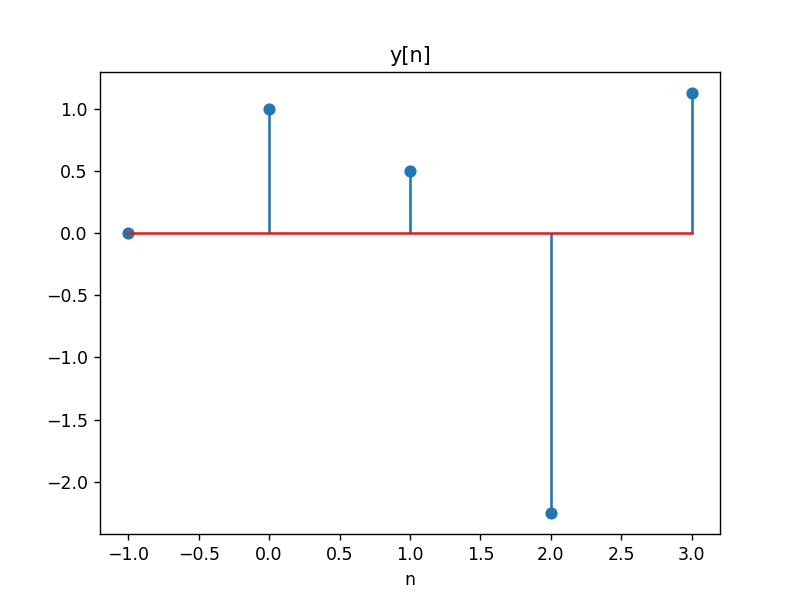

In [4]:
x = np.array([0, 1, -1, 0, 0], dtype = float)
b = [1, 2]    # girişin katsayıları
a = [1, 0.5]  # çıkışın katsayıları
y = signal.lfilter(b, a, x)
print(y)

n = np.arange(-1, 4)

plt.figure('Ön Hazırlık 2.1.1')
plt.stem(n, y)
plt.title('y[n]')
plt.xlabel('n')
plt.show()

#### 2.2.1 Hazır komut kullanmadan konvolusyon hesaplama

In [5]:
h = np.array([1, 2, -1], dtype = float)
x = np.array([1, 3], dtype = float)

M = len(h)
N = len(x)
L = M+N-1 # y işaretinin uzunluğu
y = np.zeros([L])
for n in range(L):
    y[n] = 0
    for k in range(N):
        if n-k<0 or n-k >=M:
            h_n_k = 0
        else:
            h_n_k = h[n-k]
        y[n] = y[n] + x[k]*h_n_k
print(y)

[ 1.  5.  5. -3.]


#### 2.2.2 Hazır komut kullanarak konvolusyon hesaplama

In [6]:
print(np.convolve(x, h))     # numpy konvolusyon
print(signal.convolve(x, h)) # scipy konvolusyon

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


#### 2.2.3 İki işaretinin konvolusyonunun grafiğini çizdirmek

[ 1  0  2 -1  3  0  6 -3]


<IPython.core.display.Javascript object>


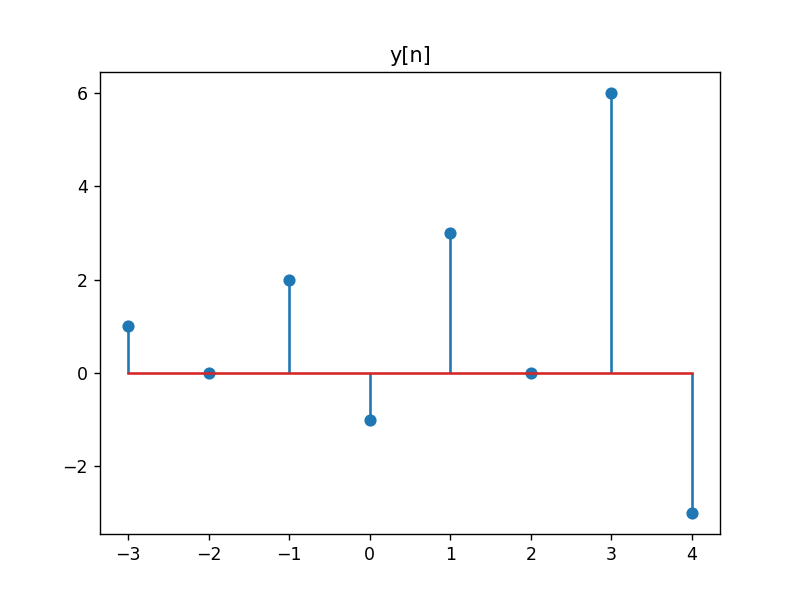

In [7]:
x = np.array([1, 0, 2, -1])
h = np.array([1, 0, 0, 0, 3])
y = np.convolve(x, h)
print(y)

n = np.arange(-3, 5)

plt.figure('Ön Hazırlık 2.2.3')
plt.stem(n, y)
plt.title('y[n]')
plt.show()

# Ön hazırlık ödevleri

### SORU-1

$y[n]=x[n]-x[n-1]$

## a)

Eğer $x[n]=\delta [n]$ dersek, $y[n]=h[n]$ olur ve bu şekilde dürtü cevabı bulunur.

$y[n]=\delta [n]-\delta [n-1]=h[n]$

## b)

$h[n]$ sadecen n=0 ve n=1 noktalarında sıfırdan başka değerlere sahip olup, sırasıyla 1 ve -1'e eşittir. $\sum_{n=-\infty}^{\infty}|h[n]|<\infty$ olduğu için sistem kararlıdır.

## c)

<IPython.core.display.Javascript object>


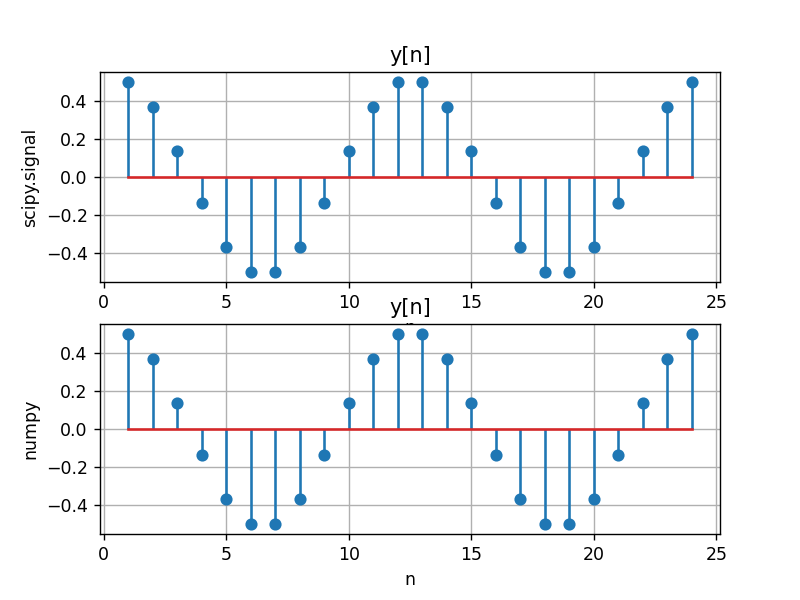

In [8]:
# x[n] = sin(pi*n/6)
# N = (2*pi)/(pi/6) = 12

n = np.arange(1, 25)   # iki periyot için 24 örnek gereklidir
x = np.sin(np.pi*n/6)  # işaret tanımlandı
h = np.array([1, -1])  # dürtü yanıtı tanımlandı

y_sc = signal.convolve(x, h, 'same') # scipy konvolusyon
y_nc = np.convolve(x, h, 'same')     # numpy konvolusyon

plt.figure('1.c') # yeni figür

plt.subplot(2, 1, 1) # 1. satır 1. sütun
plt.stem(n, y_sc)
plt.title('y[n]')          # figür başlığı eklendi
plt.xlabel('n')            # x ekseni isimlendirildi
plt.ylabel('scipy.signal') # y ekseninde kütüphane adı belirtildi
plt.grid('true')

plt.subplot(2, 1 ,2) # 2. satır 1. sütun
plt.stem(n, y_nc)
plt.title('y[n]')
plt.xlabel('n')
plt.ylabel('numpy')
plt.grid('true')
plt.show()

### SORU-2

sistem 1: $y[n] - 0.5y[n-1] = x[n]$

sistem 2: $y[n] - 2y[n-1] = x[n]$

$y[n]-ay[n-1]=x[n]$ şeklinde genelleme yapıp $x[n]=\delta[n]$ dersek, $y[n]=h[n]=a^nu[n]$ olarak bulunur.

## a)

<IPython.core.display.Javascript object>


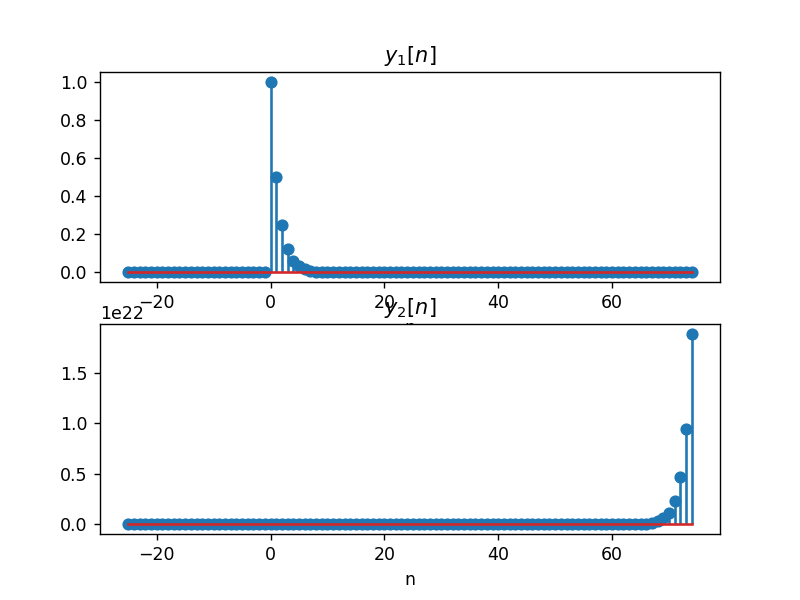

In [9]:
# y_1[n] = 0.5y[n-1] + x[n]
# y_2[n] = 2y[n-1] + x[n]

n = np.arange(-25, 75) # 100 noktalı aralık ayarlandı

x = np.zeros(len(n)) # n noktadan oluşan giriş işareti
# ilk değerleri 0 olan çıkış işaretleri tanımlandı
y_1 = [0] 
y_2 = [0]

for k in range(1, len(n)):
    # dürtü işareti oluşturuldu
    if n[k] == 0: # başta tüm elemanları zaten sıfır olduğu için else kısmına gerek yok
        x[k] = 1.0
        
    # her n değerine karşılık çıkış işaretleri hesaplandı
    y_1.append(0.5*y_1[k-1] + x[k])
    y_2.append(2*y_2[k-1] + x[k])

plt.figure('2.a') # yeni figür

plt.subplot(2, 1, 1) # 1. satır 1. sütun
plt.stem(n, y_1)
plt.title('$y_1[n]$')      # figür başlığı eklendi
plt.xlabel('n')            # x ekseni isimlendirildi

plt.subplot(2, 1, 2) # 2. satır 1. sütun
plt.stem(n, y_2)
plt.title('$y_2[n]$')
plt.xlabel('n')
plt.show()

## b)

Sınırlı giriş uygulandığında sınırlı çıkış elde ediliyorsa yani $\sum_{n=-\infty}^{\infty}|y[n]|<\infty$ koşulu sağlanıyorsa sistem kararlıdır. 

Birinci sistemde $\sum_{n=-\infty}^{\infty}|0.5^n|=1/(1-0.5)=2<\infty$ olduğu için sistem kararlıdır.

İkinci sistemde $\sum_{n=-\infty}^{\infty}|2^n|=\infty$ olduğu için sistem kararlı değildir.

Grafiklere bakıldığında da birinci sistemde n büyüdükçe çıkış 0'a yakınsarken, ikinci sistemde çıkışın üstel şekilde artarak sonsuza yakınsadığı görülmektedir.

## c)

Her iki grafiğe bakıldığında da $y[n]=h[n] = 0, n<0$ olduğu görülmektedir. Bu durumda iki sistem de nedenseldir.

### SORU-3

sistem 1: $h[n]=(1/3)(\delta[n+1]+\delta[n]+\delta[n-1])$

sistem 2: $h[n]=(\delta[n]+\delta[n-3])$

In [10]:
h_1 = (1/3)*np.array([1, 1, 1]) # 1. sistemin dürtü cevabı
h_2 = np.array([1, 0, 0, 1])    # 2. sistemin dürtü cevabı

# u[n-a] = (k=a->sonsuz)dirac[n-k]

## a) 

$x_1[n]=cos(\pi n/5)(u[n]-u[n-20])$

<IPython.core.display.Javascript object>


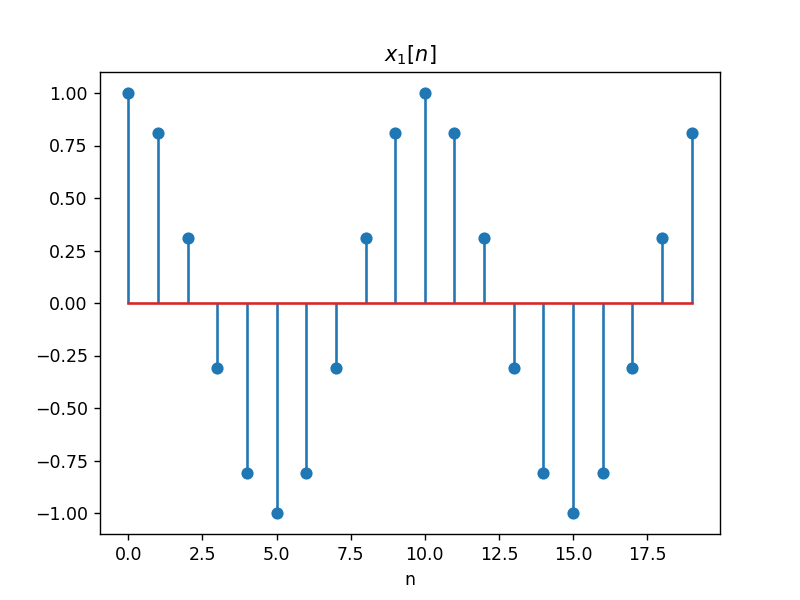

<IPython.core.display.Javascript object>


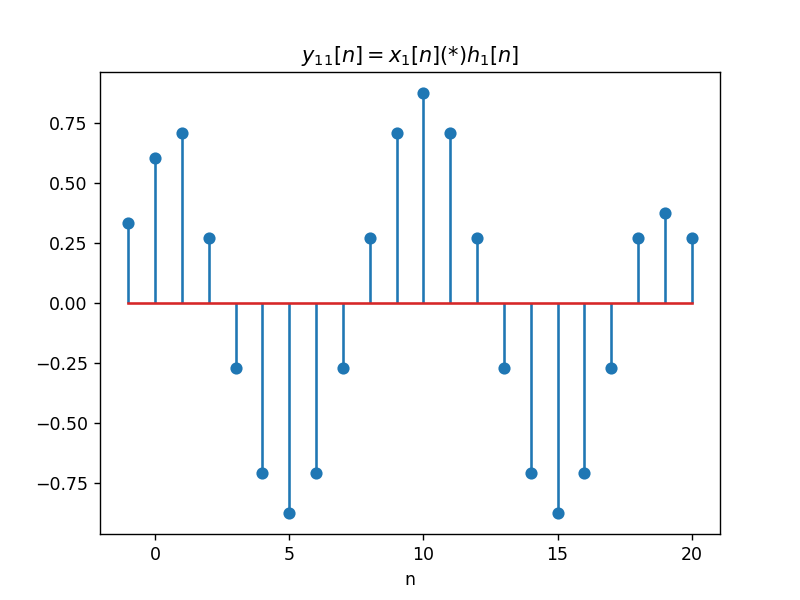

<IPython.core.display.Javascript object>


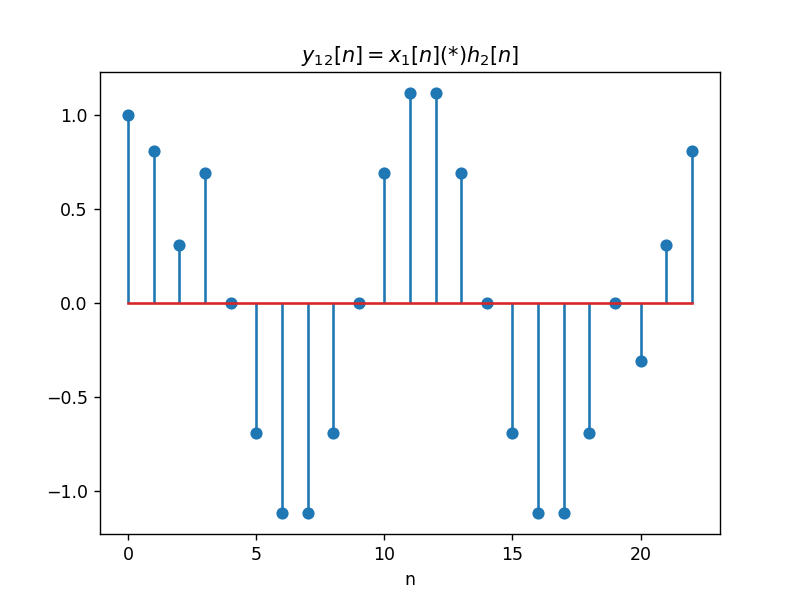

In [11]:
cos = np.cos
pi = np.pi

n_1 = np.arange(0, 20) # u[n]-u[n-20] 0 ile 19 arasında sıfırdan farklı değer alır
x_1 = cos(pi*n_1/5)

y_1_1 = np.convolve(x_1, h_1) # uzunluğu: 3+20-1 = 22
y_1_2 = np.convolve(x_1, h_2) # uzunluğu : 4+20-1 = 23

# dirac(n)(*)dirac(n+1) = dirac(n-1) -> ilk indis -1
# dirac(n-19)(*)dirac(n-1) = dirac(n-20) -> son indis 20

n_y_1 = np.arange(-1, 21) # aralık 22 örnekten oluştu, len(y_1_1) = len(n_y_1)

# dirac(n)(*)dirac(n) = dirac(n) -> ilk indis 0
# dirac(n-19)(*)dirac(n-3) = dirac(n-22) -> son indis 22

n_y_2 = np.arange(0, 23) # aralık 23 örnekten oluştu, len(y_1_2) = len(n_y_2)
    
plt.figure('3.a')     # yeni figür
plt.stem(n_1, x_1)    # x_1
plt.title('$x_1[n]$') # figür başlığı eklendi
plt.xlabel('n')       # x ekseni isimlendirildi

plt.figure('sistem 1.a') # yeni figür
plt.stem(n_y_1, y_1_1)   # y_1_1
plt.title('$y_{11}[n]=x_1[n](*)h_1[n]$') 
plt.xlabel('n')

plt.figure('sistem 2.a') # yeni figür
plt.stem(n_y_2, y_1_2)   # y_1_2
plt.title('$y_{12}[n]=x_1[n](*)h_2[n]$')
plt.xlabel('n')

plt.show()

## b)

$x_2[n]=(-3)^n(u[n]-u[n-5])$

<IPython.core.display.Javascript object>


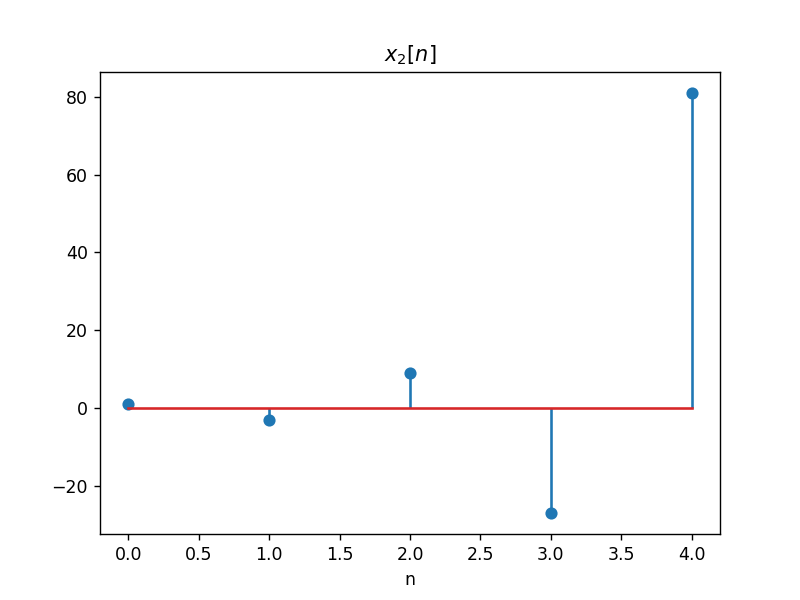

<IPython.core.display.Javascript object>


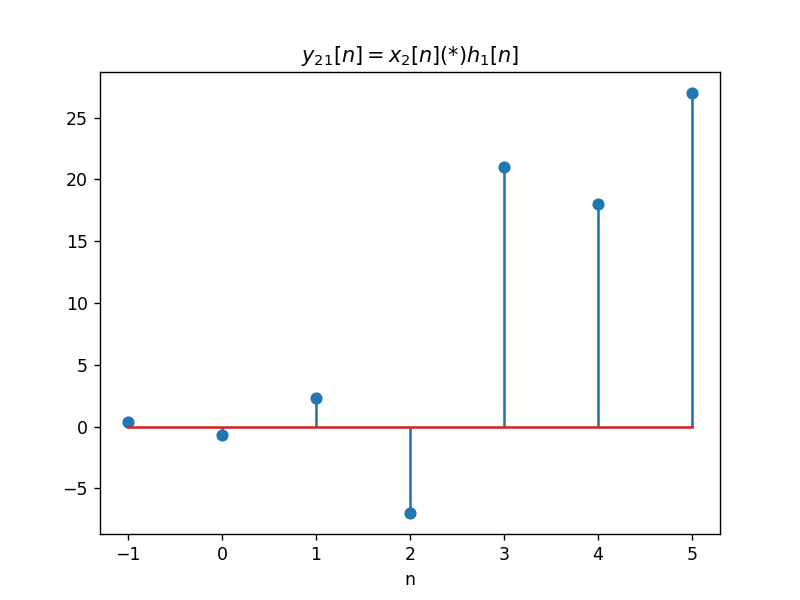

<IPython.core.display.Javascript object>


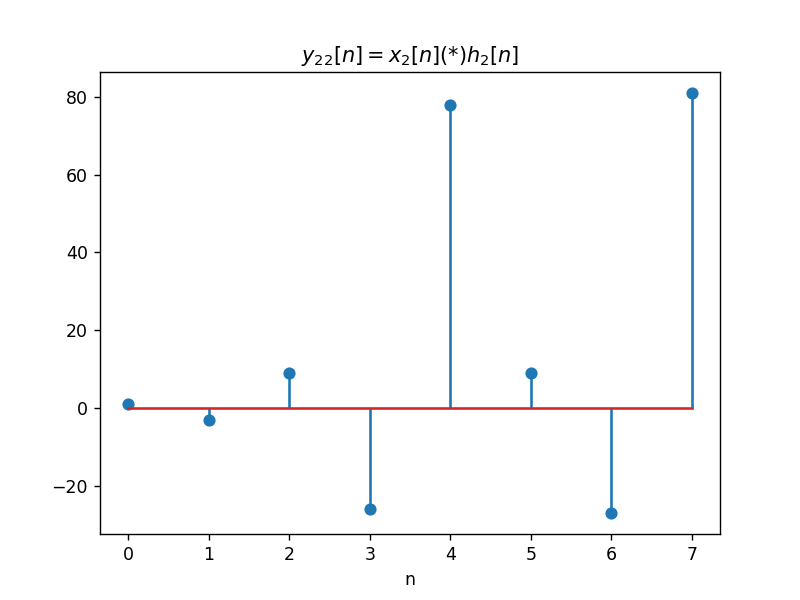

In [12]:
n_2 = np.arange(0, 5) # u[n]-u[n-5] 0-4 arasında sıfırdan farklı değer alır

x_2 = (-3.0)**n_2

y_2_1 = np.convolve(x_2, h_1) # uzunluğu: 3+4-1 = 6
y_2_2 = np.convolve(x_2, h_2) # uzunluğu: 4+4-1 = 7

# dirac(n)(*)dirac(n+1) = dirac(n+1) -> ilk indis -1
# dirac(n-4)(*)dirac(n-1) = dirac(n-5) -> son indis 5

n_y_1 = np.arange(-1, 6) # aralık 6 örnekten oluştu, len(y_1_1) = len(n_y_1)

# dirac(n)(*)dirac(n) = dirac(n) -> ilk indis 0
# dirac(n-19)(*)dirac(n-3) = dirac(n-22) -> son indis 22

n_y_2 = np.arange(0, 8) # aralık 7 örnekten oluştu, len(y_1_2) = len(n_y_2)

plt.figure() # yeni figür
plt.stem(n_2, x_2) # x_1
plt.title('$x_2[n]$') # figür başlığı eklendi
plt.xlabel('n')       # x ekseni isimlendirildi

plt.figure('sistem 1.b') # yeni figür
plt.stem(n_y_1, y_2_1) # y_1_1
plt.title('$y_{21}[n]=x_2[n](*)h_1[n]$') 
plt.xlabel('n')

plt.figure('sistem 2.b') # yeni figür
plt.stem(n_y_2, y_2_2) # y_1_2
plt.title('$y_{22}[n]=x_2[n](*)h_2[n]$')
plt.xlabel('n')

plt.show()